In [1]:
import numpy as np
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt 
import geopandas as gpd
import osmnx as ox
import itertools as it
%matplotlib inline

# Preprocessing

## 1. Graph from OSM (Kota Yogyakarta, Indonesia)

In [2]:
# Street networks from a geocode location.
G = ox.graph.graph_from_place("Kota Yogyakarta, Indonesia",network_type='drive', simplify=True, custom_filter='["highway"~"primary|trunk|secondary|tertiary"]')

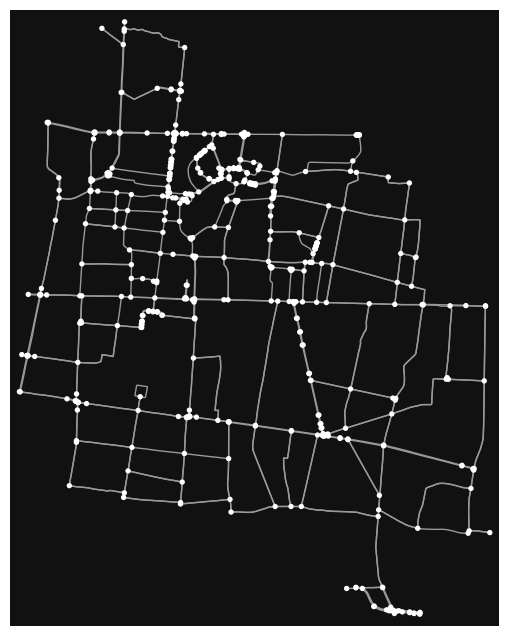

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [3]:
# Visualisation
ox.plot_graph(G)

## Origin Destination's Nodes Location

### Inputting OD's Geometry

In [4]:
#Pakualaman is not defined in OpenStreetMap, merging the geometry that constitute Pakualaman.
pakualaman = ["Gunung ketur, Kota Yogyakarta, Indonesia","Bausasran, Kota Yogyakarta, Indonesia",
              "Pakualaman, Kota Yogyakarta, Indonesia", 
              "Batas Wilayah RW 02 Kelurahan Gunungketur, Kota Yogyakarta, Indonesia"]
pakualaman = ox.geocode_to_gdf(pakualaman)
pakualaman = pakualaman.dissolve()
pakualaman = pakualaman.replace("Gunung ketur, Yogyakarta, Special Region of Yogyakarta, Indonesia",
                                "Pakualaman, Yogyakarta, Special Region of Yogyakarta, Indonesia")
display(pakualaman)

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((110.37750 -7.79732, 110.37749 -7.797...",-7.797324,-7.804723,110.380675,110.373041,298368056,relation,5615711,-7.801033,110.378709,"Pakualaman, Yogyakarta, Special Region of Yogy...",boundary,administrative,0.77


(427358.0889348225, 434946.5295682836, -867085.2089826264, -858130.7770321547)

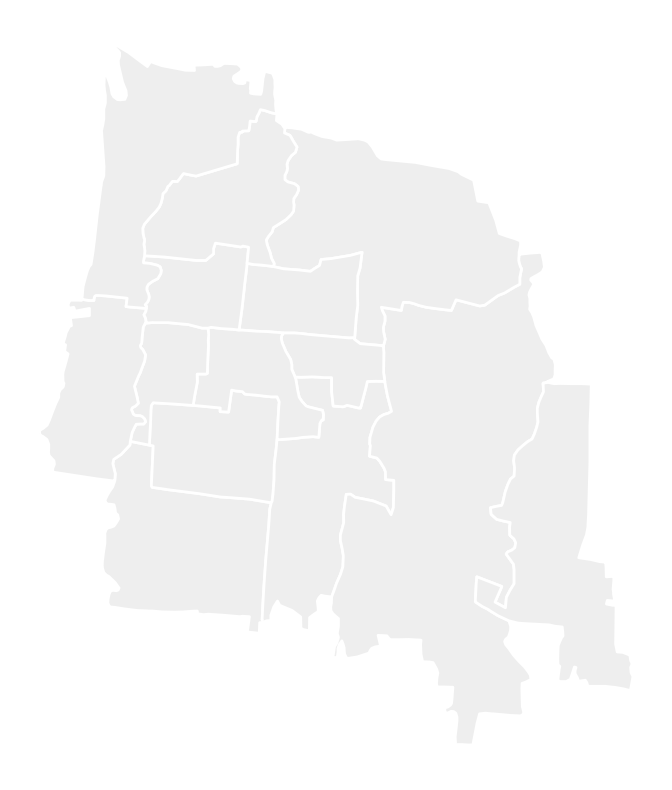

In [5]:
#Other location used as inner OD.
places = ["Mantrijeron, Kota Yogyakarta, Indonesia","Kraton, Kota Yogyakarta, Indonesia",
          "Mergangsan, Kota Yogyakarta, Indonesia","Umbulharjo, Kota Yogyakarta, Indonesia",
          "Kotagede, Kota Yogyakarta, Indonesia","Gondokusuman, Kota Yogyakarta, Indonesia",
          "Danurejan, Kota Yogyakarta, Indonesia", "Gondomanan, Kota Yogyakarta, Indonesia",
          "Ngampilan, Kota Yogyakarta, Indonesia", "Wirobrajan, Kota Yogyakarta, Indonesia",
          "Gedongtengen, Kota Yogyakarta, Indonesia", "Jetis, Kota Yogyakarta, Indonesia",
          "Tegalrejo, Kota Yogyakarta, Indonesia"]

#Polygon of the places.
places = ox.geocode_to_gdf(places)

#Concatenating pakualaman to the data.
places = pd.concat([places.iloc[:7], pakualaman, places.iloc[7:]], ignore_index=True)

places = ox.project_gdf(places)
fig, ax = plt.subplots(figsize=(20, 10))
places.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
ax.axis('off')

(311271.23004651885, 531461.0512117816, -914449.9946570757, -748115.8121198618)

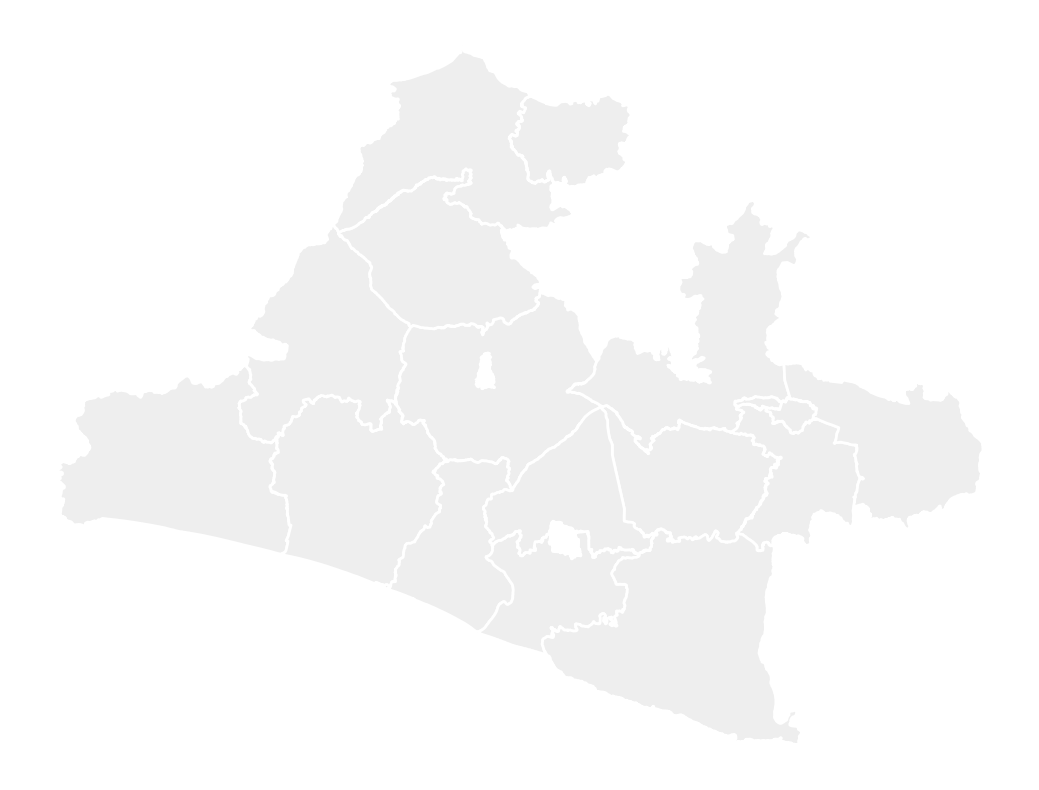

In [6]:
places_outer = ["Kebumen, Jawa Tengah, Indonesia","Purworejo, Jawa Tengah, Indonesia",
          "Wonosobo, Jawa Tengah, Indonesia","Magelang, Jawa Tengah, Indonesia",
          "Boyolali, Jawa Tengah, Indonesia","Klaten, Jawa Tengah, Indonesia",
          "Sukoharjo, Jawa Tengah, Indonesia","Karanganyar, Jawa Tengah, Indonesia",
          "Semarang, Jawa Tengah, Indonesia", "Temanggung, Jawa Tengah, Indonesia",
          "Kendal, Jawa Tengah, Indonesia",
          "Surakarta, Jawa Tengah, Indonesia","Kulon Progo, Daerah Istimewa Yogyakarta, Indonesia",
          "Bantul, Daerah Istimewa Yogyakarta, Indonesia",
          "Kabupaten Gunung Kidul, Daerah Istimewa Yogyakarta, Indonesia",
          "Sleman Regency, Daerah Istimewa Yogyakarta, Indonesia"]

places_outer = ox.geocode_to_gdf(places_outer)

places_outer = ox.project_gdf(places_outer)
fig, ax = plt.subplots(figsize=(20, 10))
places_outer.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
ax.axis('off')

In [65]:
G = ox.graph.graph_from_place("Kota Yogyakarta, Indonesia",network_type='drive', simplify=True, custom_filter='["highway"~"primary|trunk|secondary|tertiary"]')
gdfs = ox.utils_graph.graph_to_gdfs(G, nodes=False, edges=True, fill_edge_geometry=True)
display(gdfs)
# convert ke planar
#gdfs = ox.projection.project_gdf(gdfs,to_crs='EPSG:23879')
gdfs = ox.projection.project_gdf(gdfs,to_crs='+proj=utm +zone=49 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs')
print(gdfs.crs)

osmid  \
u           v           key                                                      
262855957   7698514133  0                                            824465136   
            7305115594  0                                            933729436   
262855999   1664896897  0                                            153857840   
262856002   5638791551  0                                            237087258   
            5638791549  0                                           1125285050   
...                                                                        ...   
10294108890 1367946501  0    [370513923, 136859398, 136916247, 1077021596, ...   
            10294108893 0                                           1125730761   
10294108893 1501425065  0                                            136859402   
            7290233306  0                                            136859402   
            10294108890 0                                           1125730761   

                             oneway lanes  \
u           v           key                 
262855957   7698514133  0      True     2   
            7305115594  0      True     2   
262855999   1664896897  0      True     2   
262856002   5638791551  0      True   NaN   
            5638791549  0      True   NaN   
...                             ...   ...   
10294108890 1367946501  0     False     2   
            10294108893 0     False   NaN   
10294108893 1501425065  0     False     1   
            7290233306  0     False     1   
            10294108890 0     False   NaN   

                                                               name  \
u           v           key                                           
262855957   7698514133  0                      Jalan Urip Sumoharjo   
            7305115594  0                             Jalan Affandi   
262855999   1664896897  0                                       NaN   
262856002   5638791551  0                         Jalan Jlagran Lor   
            5638791549  0            Jalan Letnan Jenderal Suprapto   
...                                                             ...   
10294108890 1367946501  0    [Jalan Rejowinangun, Jalan Ki Penjawi]   
            10294108893 0                                       NaN   
10294108893 1501425065  0                          Jalan Kebun Raya   
            7290233306  0                          Jalan Kebun Raya   
            10294108890 0                                       NaN   

                                   highway reversed   length   width  \
u           v           key                                            
262855957   7698514133  0          primary    False    8.843     NaN   
            7305115594  0          primary    False    7.396       5   
262855999   1664896897  0        secondary    False   15.948     NaN   
262856002   5638791551  0        secondary    False    5.543     NaN   
            5638791549  0        secondary    False    9.980     NaN   
...                                    ...      ...      ...     ...   
10294108890 1367946501  0        secondary     True  993.663  [6, 5]   
            10294108893 0    tertiary_link     True   24.652     NaN   
10294108893 1501425065  0         tertiary    False   26.952       6   
            7290233306  0         tertiary     True  906.716       6   
            10294108890 0    tertiary_link    False   24.652     NaN   

                               junction  \
u           v           key               
262855957   7698514133  0           NaN   
            7305115594  0           NaN   
262855999   1664896897  0    roundabout   
262856002   5638791551  0           NaN   
            5638791549  0           NaN   
...                                 ...   
10294108890 1367946501  0           NaN   
            10294108893 0           NaN   
10294108893 1501425065  0           NaN   
            7290233306  0           NaN   
            10294108890 0           NaN   


+proj=utm +zone=49 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [59]:
G.graph["crs"]

'epsg:4326'

In [61]:
print(gdfs.crs)

+proj=utm +zone=49 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [60]:
#set crs
print(places.crs)
print(node_OD.crs)

+proj=utm +zone=49 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs
+proj=utm +zone=49 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


Text(0.5, 1.0, 'OD nodes in Kota Yogyakarta')

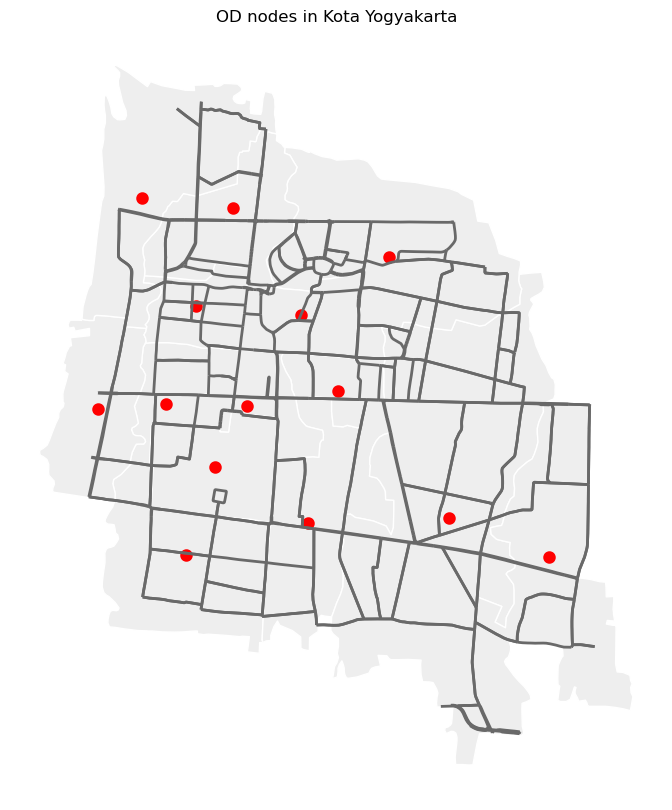

In [90]:
#It is assumed that OD nodes are in the 
# Centre Point of inner OD's polygon.
node_OD = places['geometry'].representative_point()
fig, ax = plt.subplots(figsize=(20, 10))
places.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=1)
node_OD.plot(ax=ax, linewidth=3, alpha=1, color='red')
gdfs.plot(ax=ax, linewidth=2, color="dimgrey", alpha=1)
ax.axis("off")
ax.set_title("OD nodes in Kota Yogyakarta")

Text(0.5, 1.0, 'Titik OD di Luar Yogyakarta')

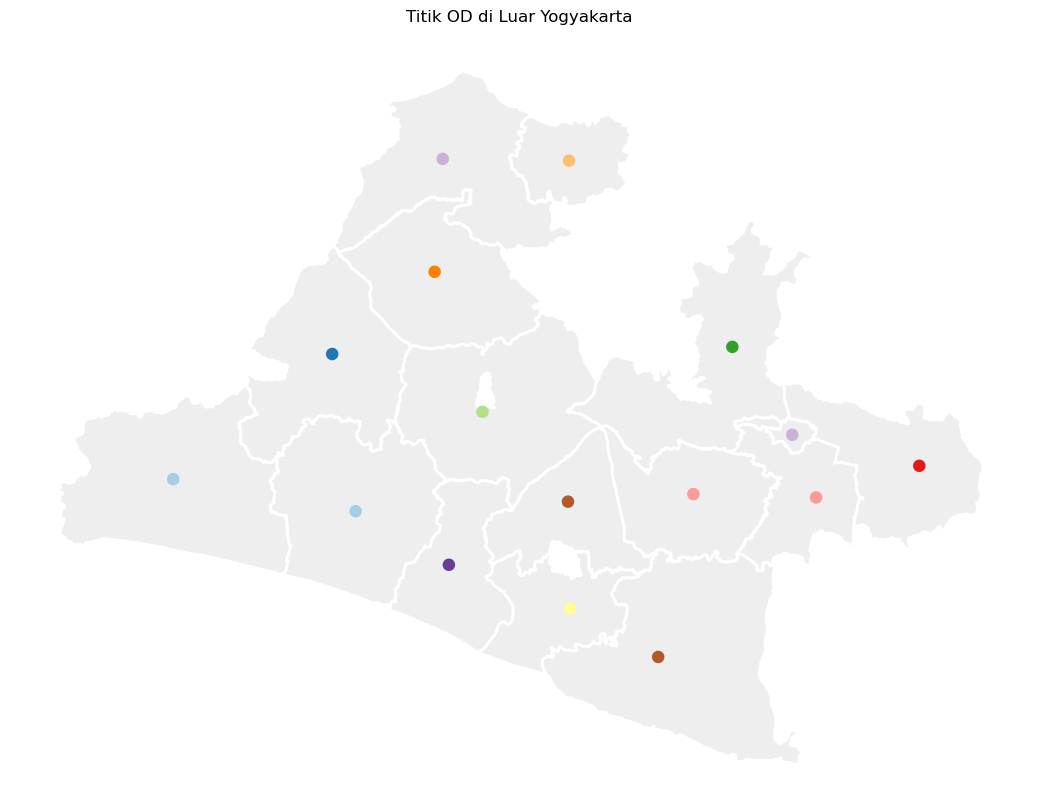

In [8]:
#For outer OD
node_OD_outer = places_outer['geometry'].representative_point()
fig, ax = plt.subplots(figsize=(20, 10))
places_outer.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
node_OD_outer.plot(ax=ax, linewidth=3, alpha=1, cmap="Paired")
ax.axis("off")
ax.set_title("Titik OD di Luar Yogyakarta")

### Nearest Nodes of each OD

#### Inner OD

In [9]:
#Finding langitude and latitude from OD's centre point.
X = node_OD.x.values
Y = node_OD.y.values

#Nearest Nodes.
nodes_inner = pd.Series(ox.nearest_nodes(G, X, Y))

#### Outer OD

In [10]:
#Finding langitude and latitude from OD's centre point.
X = node_OD_outer.x.values
Y = node_OD_outer.y.values

#Nearest Nodes.
nodes_outer = pd.Series(ox.nearest_nodes(G, X, Y))

In [11]:
#Concatenate inner and outer ODs
nodes = pd.concat([nodes_inner, nodes_outer], ignore_index=True)

In [12]:
display(nodes)

0     10232167991
1     10232167991
2      1625428085
3      5606220000
4     10232167991
5      2325131657
6      5610878579
7      1660354503
8     10232167991
9     10232167991
10     5634358070
11     5610878579
12     5606220000
13     5606220000
14     1625428085
15     1625428085
16     7284040691
17     6820465609
18     6820465609
19     1625428085
20     1625428085
21    10232167991
22     7284040691
23     5606220000
24     6820465609
25      270392740
26      270392740
27     6820465609
28     1661691774
29     5606220000
dtype: int64

## Getting Flow From OD Matrices

In [13]:
#Tidying OD matrices
OD = pd.read_excel('OD.xlsx',sheet_name='read')
OD.columns = list(range(1,len(OD.index)+1))

### Flow function

In [14]:
def Flow_from_OD(OD):
    OD.index += 1
    OD.columns = list(range(1,len(OD.index)+1))
    if not len(OD.index) == len(OD.columns):
        raise IndexError(
            (
                "The number of origin and destination must be the same."
            )
        )
    for origin in range(1,len(OD.index)+1):
        for dests in range(1,len(OD.columns)+1):
            if origin == dests:
                yield 0
            else:
                flow = OD.iloc[origin-1 ,OD.columns.get_loc(dests)]
                yield flow              

In [15]:
%%time
#using numpy structured array
flow = np.fromiter(Flow_from_OD(pd.read_excel('OD.xlsx',sheet_name='read')), 
                   dtype=[('origin','int64'),('dests','int64'),('flow','int64')])
flow = flow['flow']


CPU times: user 98.7 ms, sys: 3.26 ms, total: 102 ms
Wall time: 104 ms


## Speed, Travel Times, Lane, Width and Capacity Imputation.

### Speed
The `ox.add_edge_speeds` function add edge speeds (km per hour) to graph as new `speed_kph` edge attributes. Imputes free-flow travel speeds for all edges based on mean `maxspeed` value of edges, per highway type. This mean-imputation can obviously be imprecise, and the caller can override it by passing in `hwy_speeds` and/or `fallback` arguments that correspond to local speed limit standards. See docstring for details.

In [16]:
# impute speed on all edges missing data
G = ox.add_edge_speeds(G)

### Initial Travel Times

In [17]:
# calculate travel time (seconds) for all edges
G = ox.add_edge_travel_times(G)

### Lanes

In [18]:
def add_edge_lanes(G, lanes_min=1):
    """
    Add default lanes towards NaN lanes value in edge attributes.
    It also change lanes column type into numeric.
    
    By default, this imputes 1 lane toward existing NaN values.
    
    Parameters
    ----------
    G : networkX.MultiDiGraph
        input graph
    lanes_min : int
        assigning minimum values to be inserted.
    """
    #Check if lanes_min is integer
    if not isinstance(lanes_min, int):
        raise TypeError(
            (
                "lanes_min type must be an integer."
            )
        )
    
    edges = ox.utils_graph.graph_to_gdfs(G, nodes=False, fill_edge_geometry=False)
    
    #Change all list values in lanes colum into maximum value of lanes
    #in that list.
    edges["lanes"] = [int(max(x)) if isinstance(x, list) else x for x in edges['lanes']]
    
    #Impute missing values with lanes value.
    lanes = (
        edges[["highway", "lanes"]].set_index("highway").iloc[:, 0].fillna(lanes_min)
    )
    edges["lanes"] = lanes.values
    
    #Change lanes column into numeric
    edges['lanes']=pd.to_numeric(edges['lanes'])
    nx.set_edge_attributes(G, values=edges["lanes"], name="lanes")
    
    return G

In [19]:
G = add_edge_lanes(G)

### Width

In [20]:
def add_edge_width(G, width_min=3.5):
    """
    Add default width towards NaN width value in edge attributes.
    
    By default, this imputes 3.5 meters toward existing NaN values.
    
    Parameters
    ----------
    G : networkX.MultiDiGraph
        input graph
    width_min : int
        assigning minimum values to be inserted.
    """
    #Check if width_min is float
    if not isinstance(width_min, (float,int)):
        raise TypeError(
            (
                "width_min type must be an integer or float."
            )
        )
    
    edges = ox.utils_graph.graph_to_gdfs(G, nodes=False, fill_edge_geometry=False)
    
    #Change all list values in lanes colum into maximum value of lanes
    #in that list.
    edges["width"] = [int(max(x)) if isinstance(x, list) else x for x in edges['width']]
    
    #Impute missing values with width value.
    width = (
        edges[["highway", "width"]].set_index("highway").iloc[:, 0].fillna(width_min)
    )
    #Change lanes column into numeric
    edges["width"]=pd.to_numeric(edges["width"])
    edges["width"] = width.values
    display(edges["width"])
    nx.set_edge_attributes(G, values=edges["width"], name="width")
    
    return G

In [21]:
G = add_edge_width(G)

u            v            key
262855957    7698514133   0      3.5
             7305115594   0        5
262855999    1664896897   0      3.5
262856002    5638791551   0      3.5
             5638791549   0      3.5
                                ... 
10294108890  1367946501   0        6
             10294108893  0      3.5
10294108893  1501425065   0        6
             7290233306   0        6
             10294108890  0      3.5
Name: width, Length: 999, dtype: object

### Capacity
Imputing capacity value based on modification of 'ox.add_edge_travel_times()'.
The capacity is based on lane width and lane numbers.
The value used is based on Indonesia's Highway Capacity Manual.
If there is no lane width nor lane numbers, the capacity of the edges is assumed 1650,
the capacity for 1 lane of 3.5m width.

In [22]:
def add_edge_capacity(G, base_capacity=None, fallback=1650):
    """
    Add edge capacity to graph as new "capacity" edge attributes.
    
    By default, this imputes 1650 * number of lane toward existing 
    NaN values.
    
    Parameters
    ----------
    G : networkX.MultiDiGraph
        input graph
    base_capacity : dict
        dict keys = OSM highway types and values = typical capacity
        to assign to edges of that highway type for any edges missing
        capacity data. Any edges with highway type not in `base_capacity` 
        will be assigned the fallback value.
    fallback : numeric
        default capacity value to assign to edges whose highway
        type did not appear in `base_capacity`. Default value is based on
        Indonesian Higway Capacity Manual 1997 (MKJI 1997).
    """
    
    edges = ox.utils_graph.graph_to_gdfs(G, nodes=False, fill_edge_geometry=False)

    # collapse any highway lists (can happen during graph simplification)
    # into string values simply by keeping just the first element of the list
    edges["highway"] = edges["highway"].map(lambda x: x[0] if isinstance(x, list) else x)
    edges["capacity"] = None
    # if user provided base_capacity, use them as default values, otherwise
    # initialize an empty series to populate with fallback values.
    if base_capacity is None:
        capacity_avg = pd.Series(dtype=float).fillna(fallback)
    else:
        capacity_avg = pd.Series(base_capacity).dropna()
    
    # for each highway type that caller did not provide in base_capacity, impute
    # capacity of type by using fallback values
    for cap, group in edges.groupby("highway"):
        if cap not in capacity_avg:
            capacity_avg.loc[cap] = fallback
    
    #Impute missing values with lanes value.
    capacity = (
        edges[["highway", "capacity"]].set_index("highway").iloc[:, 0].fillna(capacity_avg)
    )
    edges["capacity"] = capacity.round(0).values * edges["lanes"]
    nx.set_edge_attributes(G, values=edges["capacity"], name="capacity")
    
    return G

In [23]:
G = add_edge_capacity(G)

## Flatten OSMid

In [24]:
def flatten_osmid(G):
    df = ox.graph_to_gdfs(ox.project_graph(G), nodes=False)
    #Flatten the osmid, can happen during simplification.
    df['osmid'] = df['osmid'].map(lambda x: x[0] if isinstance(x, list) else x).values
    df["highway"] = df["highway"].map(lambda x: x[0] if isinstance(x, list) else x).values
    nx.set_edge_attributes(G, df['osmid'], name='osmid')
    nx.set_edge_attributes(G, df["highway"], name="highway")
    return G  

In [25]:
#Flatten osmid
G = flatten_osmid(G)
#Convert networkX graph into GeoDataFrame.
list_jalan = ox.graph_to_gdfs(ox.project_graph(G), nodes=False)
#Summary of the number of highway based on the highway type.
list_jalan.groupby("highway",dropna=False)[["length", "speed_kph", "travel_time","lanes","width"]].size()
list_jalan

osmid  oneway  lanes  \
u           v           key                              
262855957   7698514133  0     824465136    True      2   
            7305115594  0     933729436    True      2   
7698514133  269401983   0     289505394    True      3   
7305115594  7698514133  0     824465135    True      2   
            7305115644  0     824492966    True      2   
...                                 ...     ...    ...   
10278690374 10278690372 0     590301378    True      2   
10278690373 5636328405  0    1096212684    True      2   
            10278690374 0    1123960536   False      1   
10278525281 10278525280 0    1123951620   False      1   
            10278525279 0    1096212684    True      2   

                                                name       highway reversed  \
u           v           key                                                   
262855957   7698514133  0       Jalan Urip Sumoharjo       primary    False   
            7305115594  0              Jalan Affandi       primary    False   
7698514133  269401983   0       Jalan Urip Sumoharjo       primary    False   
7305115594  7698514133  0       Jalan Urip Sumoharjo       primary    False   
            7305115644  0    Jalan Laksda Adisucipto       primary    False   
...                                              ...           ...      ...   
10278690374 10278690372 0          Jalan Margo Utomo      tertiary    False   
10278690373 5636328405  0          Jalan Margo Utomo       primary    False   
            10278690374 0                        NaN  primary_link     True   
10278525281 10278525280 0                        NaN  primary_link    False   
            10278525279 0          Jalan Margo Utomo       primary    False   

                              length  speed_kph  travel_time width  capacity  \
u           v           key                                                    
262855957   7698514133  0      8.843       40.0          0.8   3.5      3300   
            7305115594  0      7.396       40.0          0.7     5      3300   
7698514133  269401983   0    921.751       40.0         83.0   3.5      4950   
7305115594  7698514133  0      9.463       40.0          0.9   3.5      3300   
            7305115644  0      8.794       40.0          0.8   3.5      3300   
...                              ...        ...          ...   ...       ...   
10278690374 10278690372 0     32.939       36.7          3.2     6      3300   
10278690373 5636328405  0     33.106       40.0          3.0     6      3300   
            10278690374 0      7.908       40.0          0.7   3.5      1650   
10278525281 10278525280 0      8.824       40.0          0.8   3.5      1650   
            10278525279 0     36.481       40.0          3.3     6      3300   

                                                                      geometry  \
u           v           key                                                      
262855957   7698514133  0    LINESTRING (432488.390 -860369.437, 432480.094...   
            7305115594  0    LINESTRING (432488.390 -860369.437, 432488.523...   
7698514133  269401983   0    LINESTRING (432480.094 -860366.376, 432464.713...   
7305115594  7698514133  0    LINESTRING (432488.523 -860362.085, 432480.094...   
            7305115644  0    LINESTRING (432488.523 -860362.085, 432497.321...   
...                                                                        ...   
10278690374 10278690372 0    LINESTRING (430158.802 -860743.543, 430158.509...   
10278690373 5636328405  0    LINESTRING (430166.654 -860744.526, 430162.656...   
            10278690374 0    LINESTRING (430166.654 -860744.526, 430158.802...   
10278525281 10278525280 0    LINESTRING (430175.221 -860670.783, 430166.465...   
            10278525279 0    LINESTRING (430175.221 -860670.783, 430172.177...   

                            junction bridge maxspeed access tunnel  ref  
u           v           key                                          

# Process Algorithm

## Shortest Path

### Routing with  OSMNx

In [26]:
def OD_nodes_list(nodes_OD):
    for index, origin in nodes_OD.items():
        for index, dests in nodes_OD.items():
            yield (origin,dests)

In [27]:
# G.get_edge_data(u, v) -> taking the edge attribute from node u to v

def link_flow(G, routes, k, flow, flow_type):
    t = 'travel_time'
    if routes[k] is None:
        return G
    else:
        for i in range(len(routes[k])-1):
            minimum = G[routes[k][i]][routes[k][i+1]][0][t]
            j = 0
            keys = 0
            for j in range(len(G.get_edge_data(routes[k][i], routes[k][i+1]))):
                if G.get_edge_data(routes[k][i], routes[k][i+1], j)[t] < minimum:
                    minimum = G.get_edge_data(routes[k][i], routes[k][i+1], j)[t]
                    keys = j
            link_flow = flow + G[routes[k][i]][routes[k][i+1]][keys][flow_type]
            attrs = {(routes[k][i], routes[k][i+1], keys): {flow_type: link_flow}}
            nx.set_edge_attributes(G, attrs)
        return G

In [28]:
def OD_shortest_path(G, nodes_OD, flow_list, flow_type='flow'):
    nx.set_edge_attributes(G, 0, flow_type)
    nodes = pd.DataFrame(list(OD_nodes_list(nodes_OD)))
    routes = ox.shortest_path(G, nodes.iloc[:,0], nodes.iloc[:,1], weight="travel_time", cpus=None)
    for i in range(len(routes)):
        link_flow(G,routes, i, flow_list[i], flow_type)
    return G

### Initial Shortest Path

In [29]:
%%time
#Testing Shortest Path results.
OD_shortest_path(G, nodes, flow, flow_type='flow')
list_jalan = ox.utils_graph.graph_to_gdfs(G, nodes=False)
display(list_jalan)

osmid  oneway  lanes  \
u           v           key                              
262855957   7698514133  0     824465136    True      2   
            7305115594  0     933729436    True      2   
262855999   1664896897  0     153857840    True      2   
262856002   5638791551  0     237087258    True      1   
            5638791549  0    1125285050    True      1   
...                                 ...     ...    ...   
10294108890 1367946501  0     370513923   False      2   
            10294108893 0    1125730761   False      1   
10294108893 1501425065  0     136859402   False      1   
            7290233306  0     136859402   False      1   
            10294108890 0    1125730761   False      1   

                                                               name  \
u           v           key                                           
262855957   7698514133  0                      Jalan Urip Sumoharjo   
            7305115594  0                             Jalan Affandi   
262855999   1664896897  0                                       NaN   
262856002   5638791551  0                         Jalan Jlagran Lor   
            5638791549  0            Jalan Letnan Jenderal Suprapto   
...                                                             ...   
10294108890 1367946501  0    [Jalan Rejowinangun, Jalan Ki Penjawi]   
            10294108893 0                                       NaN   
10294108893 1501425065  0                          Jalan Kebun Raya   
            7290233306  0                          Jalan Kebun Raya   
            10294108890 0                                       NaN   

                                   highway reversed   length  speed_kph  \
u           v           key                                               
262855957   7698514133  0          primary    False    8.843       40.0   
            7305115594  0          primary    False    7.396       40.0   
262855999   1664896897  0        secondary    False   15.948       44.8   
262856002   5638791551  0        secondary    False    5.543       44.8   
            5638791549  0        secondary    False    9.980       44.8   
...                                    ...      ...      ...        ...   
10294108890 1367946501  0        secondary     True  993.663       60.0   
            10294108893 0    tertiary_link     True   24.652       40.4   
10294108893 1501425065  0         tertiary    False   26.952       36.7   
            7290233306  0         tertiary     True  906.716       36.7   
            10294108890 0    tertiary_link    False   24.652       40.4   

                             travel_time width  capacity   flow    junction  \
u           v           key                                                   
262855957   7698514133  0            0.8   3.5      3300   4280         NaN   
            7305115594  0            0.7     5      3300      0         NaN   
262855999   1664896897  0            1.3   3.5      3300  29052  roundabout   
262856002   5638791551  0            0.4   3.5      1650    658         NaN   
            5638791549  0            0.8   3.5      1650   1177         NaN   
...                                  ...   ...       ...    ...         ...   
10294108890 1367946501  0           59.6     6      3300      0         NaN   
            10294108893 0            2.2   3.5      1650      0         NaN   
10294108893 1501425065  0            2.6     6      1650      0         NaN   
            7290233306  0           88.9     6      1650   2057         NaN   
            10294108890 0            2.2   3.5      1650      0         NaN   

                                                                      geometry  \
u           v           key                                                      
262855957   7698514133  0    LINESTRING (110.38770 -7.78311, 110.38762 -7.7...   
            7305115594  0    LINESTRING (110.38770 -7.78311, 110.38770 -7.7...   
262855999   1664896897 

CPU times: user 1.11 s, sys: 161 ms, total: 1.27 s
Wall time: 12.4 s


## Updating Travel Time

### Initialize Initial Travel Time

In [30]:
## 
def add_edge_initial_travel_time(G):
    df = nx.to_pandas_edgelist(G, edge_key='ekey').set_index(["source","target","ekey"])
    df['initial_travel_time'] = df['travel_time'].values
    nx.set_edge_attributes(G, df['initial_travel_time'], name='initial_travel_time')
    return G  

### Update travel time based on LPR Function

In [31]:
## 
def update_travel_time_lpr(G, alpha=0.15, beta=4):
    df = nx.to_pandas_edgelist(G, edge_key='ekey').set_index(["source","target","ekey"])
    df['travel_time'] = df.apply(lambda x: lpr(x, alpha, beta), axis=1).values
    nx.set_edge_attributes(G, df['travel_time'], name='travel_time')
    return G

### Link Performance Function

In [32]:
#This is a link performance function derived from Indonesia's Highway Manual (MKJI 1997).
def lpr(row, alpha=0.15,beta=4):
    if np.isnan(row['flow']):
        return row['travel_time']
    else:
        try:
            return row['initial_travel_time']*(1+alpha*(row['flow']/row['capacity'])**beta)
        except ValueError:
            return row['travel_time']

## Bisection Method

In [33]:
def line_search(row, a, alpha, beta):
    t=row['initial_travel_time']
    x=row['flow']
    y=row['auxflow']
    c=row['capacity']
    return -t*(x-y)*(alpha*(((x+a*(y-x))/c)**beta)+1)

In [34]:
def bisection(G, xl=0, xr=1, delta=0.0002, alpha=0.15, beta=4):
    n = 0
    df = nx.to_pandas_edgelist(G)
    condition = True
    while condition:
        n += 1
        x = (xl+xr)/2
        if df.apply(lambda row: line_search(row, x, alpha=alpha, beta=beta), axis = 1).sum() <= 0:
            xl = x
        else:
            xr = x
        condition = abs(xr-xl) > 2*delta
        # print('|xl-xr| =', abs(xr-xl),' xl =', xl, ' xr=',xr)
    #print(f"number of iteration in bisection method is {n} with alpha = {(xr+xl)/2}")
    return (xr+xl)/2

## Updating Mainflow from Previous Flow, Aux Flow and Optimal Move Size (alpha)

In [35]:
def update(row, alpha):
    return row['flow'] + alpha * (row['auxflow'] - row['flow'])

In [36]:
def update_mainflow(G, alpha):
    df = nx.to_pandas_edgelist(G, edge_key='ekey').set_index(["source","target","ekey"])
    df['flow'] = df.apply(lambda row: update(row, alpha), axis=1).values
    nx.set_edge_attributes(G, df['flow'], name='flow')
    return G  

# User Equilibrium / Convex Combinations Algorithm

In [38]:
#Initializing flow
flow = np.fromiter(Flow_from_OD(pd.read_excel('OD.xlsx',sheet_name='read')), 
                   dtype=[('origin','int64'),('dests','int64'),('flow','int64')])
flow = flow['flow']


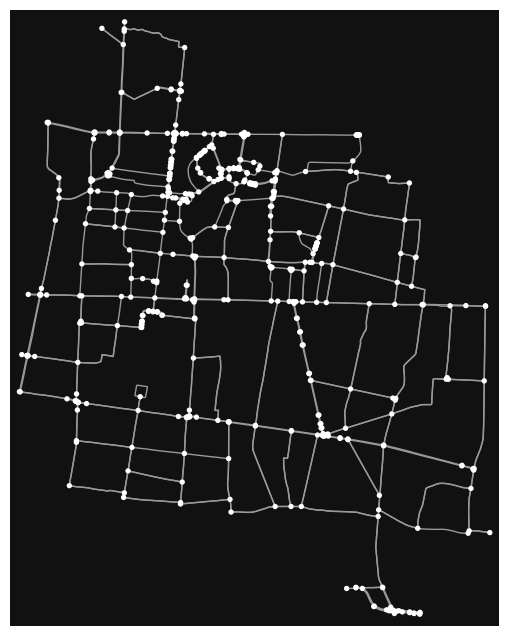

u            v            key
262855957    7698514133   0      3.5
             7305115594   0        5
262855999    1664896897   0      3.5
262856002    5638791551   0      3.5
             5638791549   0      3.5
                                ... 
10294108890  1367946501   0        6
             10294108893  0      3.5
10294108893  1501425065   0        6
             7290233306   0        6
             10294108890  0      3.5
Name: width, Length: 999, dtype: object

In [39]:
G = ox.graph.graph_from_place("Kota Yogyakarta, Indonesia",network_type='drive', simplify=True, custom_filter='["highway"~"primary|trunk|secondary|tertiary"]')
ox.plot_graph(G)
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)
G = add_edge_lanes(G)
G = add_edge_width(G)
G = add_edge_capacity(G)
G = flatten_osmid(G)

In [40]:
def CCA(G, nodes_OD, flow, number_of_iteration=10000, alpha=0.15, beta=4):
    #Initialize initial time_travel column based on travel time column 
    #from ox.add_edge_travel_times
    G = add_edge_initial_travel_time(G)
    
    # Initialize flow from OD Matrices, do shortest path
    # and Assign flow to all links.
    G = OD_shortest_path(G, nodes, flow, flow_type='flow')
    
    condition = True
    n = 0
    while condition == True:

        #Update travel time
        G = update_travel_time_lpr(G, alpha, beta)

        # Initialize flow from OD Matrices, do shortest path
        # and calculate auxiliary flow.
        G = OD_shortest_path(G, nodes, flow, flow_type='auxflow')

        # line search using bisection method
        alpha = bisection(G, alpha=alpha, beta=beta)
        if n > number_of_iteration:
            condition = False
        alpha_old = alpha
        #updating mainflow based on optimal move size and auxflow
        G = update_mainflow(G, alpha)
        n+=1
        print(n)
    return G

In [41]:
ue = CCA(G, nodes, flow)

/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


1


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


2


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


3


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


4


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


5


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


6


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


7


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


8


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


9


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


10


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


11


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


12


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


13


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


14


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


15


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


16


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


17


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


18


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


19


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


20


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


21


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


22


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


23


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


24


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


25


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


26


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


27


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

28


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


29


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


30


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


31


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


32


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


33


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


34


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


35


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


36


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


37


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

38


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


39


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


40


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


41


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

42


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


43


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

44


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


45


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


46


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


47


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

48


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


49


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


50


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


51


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

52


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


53


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


54


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


55


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


56


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


57


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


58


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


59


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


60


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


61


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


62


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


63


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


64


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


65


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


66


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


67


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


68


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


69


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


70


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


71


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


72


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


73


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


74


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

75


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


76


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


77


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

78


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


79


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


80


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


81


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

82


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


83


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

84


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


85


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


86


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


87


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

88


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


89


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


90


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

91


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


92


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


93


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


94


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


95


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

96


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


97


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


98


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

99


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


100


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


101


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


102


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


103


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


104


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


105


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


106


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


107


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


108


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


109


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


110


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


111


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


112


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


113


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


114


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


115


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


116


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


117


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


118


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


119


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


120


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

121


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


122


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


123


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


124


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


125


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


126


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


127


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

128


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


129


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

130


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


131


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


132


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


133


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

134


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


135


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


136


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


137


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


138


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


139


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


140


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


141


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

142


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


143


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


144


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


145


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: S

146


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


147


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


148


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


149


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


150


/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
/Users/maman/opt/anaconda3/envs/ox/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as mape
list_jalan = ox.graph_to_gdfs(ox.project_graph(G), nodes=False)
display(list_jalan)
display(mape(list_jalan['flow'],list_jalan['auxflow']))
list_jalan['flow'].corr(list_jalan['auxflow'])

osmid  oneway  lanes  \
u           v           key                              
262855957   7698514133  0     824465136    True      2   
            7305115594  0     933729436    True      2   
7698514133  269401983   0     289505394    True      3   
7305115594  7698514133  0     824465135    True      2   
            7305115644  0     824492966    True      2   
...                                 ...     ...    ...   
10278690374 10278690372 0     590301378    True      2   
10278690373 5636328405  0    1096212684    True      2   
            10278690374 0    1123960536   False      1   
10278525281 10278525280 0    1123951620   False      1   
            10278525279 0    1096212684    True      2   

                                                name       highway reversed  \
u           v           key                                                   
262855957   7698514133  0       Jalan Urip Sumoharjo       primary    False   
            7305115594  0              Jalan Affandi       primary    False   
7698514133  269401983   0       Jalan Urip Sumoharjo       primary    False   
7305115594  7698514133  0       Jalan Urip Sumoharjo       primary    False   
            7305115644  0    Jalan Laksda Adisucipto       primary    False   
...                                              ...           ...      ...   
10278690374 10278690372 0          Jalan Margo Utomo      tertiary    False   
10278690373 5636328405  0          Jalan Margo Utomo       primary    False   
            10278690374 0                        NaN  primary_link     True   
10278525281 10278525280 0                        NaN  primary_link    False   
            10278525279 0          Jalan Margo Utomo       primary    False   

                              length  speed_kph  travel_time width  ...  \
u           v           key                                         ...   
262855957   7698514133  0      8.843       40.0     0.829646   3.5  ...   
            7305115594  0      7.396       40.0     0.700000     5  ...   
7698514133  269401983   0    921.751       40.0    83.607562   3.5  ...   
7305115594  7698514133  0      9.463       40.0     0.900000   3.5  ...   
            7305115644  0      8.794       40.0     0.800000   3.5  ...   
...                              ...        ...          ...   ...  ...   
10278690374 10278690372 0     32.939       36.7     3.200000     6  ...   
10278690373 5636328405  0     33.106       40.0     3.000463     6  ...   
            10278690374 0      7.908       40.0     0.700000   3.5  ...   
10278525281 10278525280 0      8.824       40.0     0.800000   3.5  ...   
            10278525279 0     36.481       40.0     3.300510     6  ...   

                             initial_travel_time         flow  auxflow  \
u           v           key                                              
262855957   7698514133  0                    0.8  4256.792227     3790   
            7305115594  0                    0.7     0.000000        0   
7698514133  269401983   0                   83.0  4256.792227     3790   
7305115594  7698514133  0                    0.9     0.000000        0   
            7305115644  0                    0.8     0.000000        0   
...                                          ...          ...      ...   
10278690374 10278690372 0                    3.2     0.000000        0   
10278690373 5636328405  0                    3.0  1068.738272        0   
            10278690374 0                    0.7     0.000000        0   
10278525281 10278525280 0                    0.8     0.000000        0   
            10278525279 0                    3.3  1068.738272        0   

                                                                      geometry  \
u           v           key                                                      
262855957   7698514133  0    LINESTRING (432488.390 -860369.437, 432480.094...   
            7305115594  0    LINESTRING (432488.390 -860369.437, 4

0.809404472513593

0.7245078689431457

# 7. Validation Test

## Method 1: Scalable Quality Value Method

In [ ]:
#MGEH
def mgeh(arr_obs, arr_model):
    return np.sqrt(np.square(arr_model-arr_obs)/arr_obs)

#scaling factor
def scaling_factor(arr_obs):
    return np.ma.average(arr_obs)

#normal sqv
def n_sqv(arr_obs, arr_model, arr_corr=1):
    if type(arr_corr) is np.ndarray:
        arr_corr=arr_corr/arr_obs
    return 1/(1+np.sqrt(np.square(arr_model-arr_obs)/
            (np.ma.average(arr_obs)*arr_obs*arr_corr)))



## Method 2: Root Mean Square Error

In [ ]:
def RMSE(actual,predicted):
    MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
    RMSE = math.sqrt(MSE)
    return RMSE

<b>Integration needed </b>

In [ ]:
#SQV standard deviation
std_sqv=mgeh(observed,modeled)*np.sqrt(observed)
print(std_sqv)

NameError: name 'observed' is not defined

In [ ]:
#Normal standard deviation
std=np.std(observed)
print(std)

2.8722813232690143


In [ ]:
#implicit standard deviation - mgeh standard deviation
np.std(observed)-(mgeh(observed,modeled)*np.sqrt(observed))

array([2.77228132, 2.27228132, 2.67228132, 2.47228132, 2.07228132,
       1.57228132, 2.67228132, 2.77228132, 2.57228132, 2.67228132])

In [ ]:
#0+
observed_plus=observed+np.maximum(0,np.std(observed)
                      -(mgeh(observed,modeled)*np.sqrt(observed)))
print(observed)

[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
#Margin of Error
def rSamplingErr(arr_obs,z=1.44):
    return z*np.std(arr_obs)/math.sqrt(len(arr_obs)/np.mean(arr_obs)

SyntaxError: invalid syntax (816697539.py, line 4)

In [ ]:
rSamplingErr(observed)

0.23780817326729384

In [ ]:
observed_Splus=observed_plus*(1+rSamplingErr(observed))
print(observed_Splus)

[ 4.66936065  5.28826474  7.02119618  8.01144272  8.75412763  9.37303171
 11.97242888 13.33401787 14.32426441 15.6858534 ]


In [ ]:
#compate modified n_sqv and manually calculate corrected sqv
print(n_sqv(observed, modeled,observed_Splus))

c_sqv=1/(1+np.sqrt(np.square(modeled-observed)/
            (np.ma.average(observed)*observed_Splus)))
print(c_sqv)

[0.98064899 0.89988476 0.9688193  0.94316561 0.89662553 0.8466972
 0.97594622 0.9884576  0.96730603 0.97892137]
[0.98064899 0.89988476 0.9688193  0.94316561 0.89662553 0.8466972
 0.97594622 0.9884576  0.96730603 0.97892137]
